# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [108]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [109]:
df = pd.read_csv("data/nndb_flat.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FoodGroup         8618 non-null   object 
 1   ShortDescrip      8618 non-null   object 
 2   Descrip           8618 non-null   object 
 3   CommonName        1063 non-null   object 
 4   MfgName           1560 non-null   object 
 5   ScientificName    732 non-null    object 
 6   Energy_kcal       8618 non-null   float64
 7   Protein_g         8618 non-null   float64
 8   Fat_g             8618 non-null   float64
 9   Carb_g            8618 non-null   float64
 10  Sugar_g           8618 non-null   float64
 11  Fiber_g           8618 non-null   float64
 12  VitA_mcg          8618 non-null   float64
 13  VitB6_mg          8618 non-null   float64
 14  VitB12_mcg        8618 non-null   float64
 15  VitC_mg           8618 non-null   float64
 16  VitE_mg           8618 non-null   float64
 

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

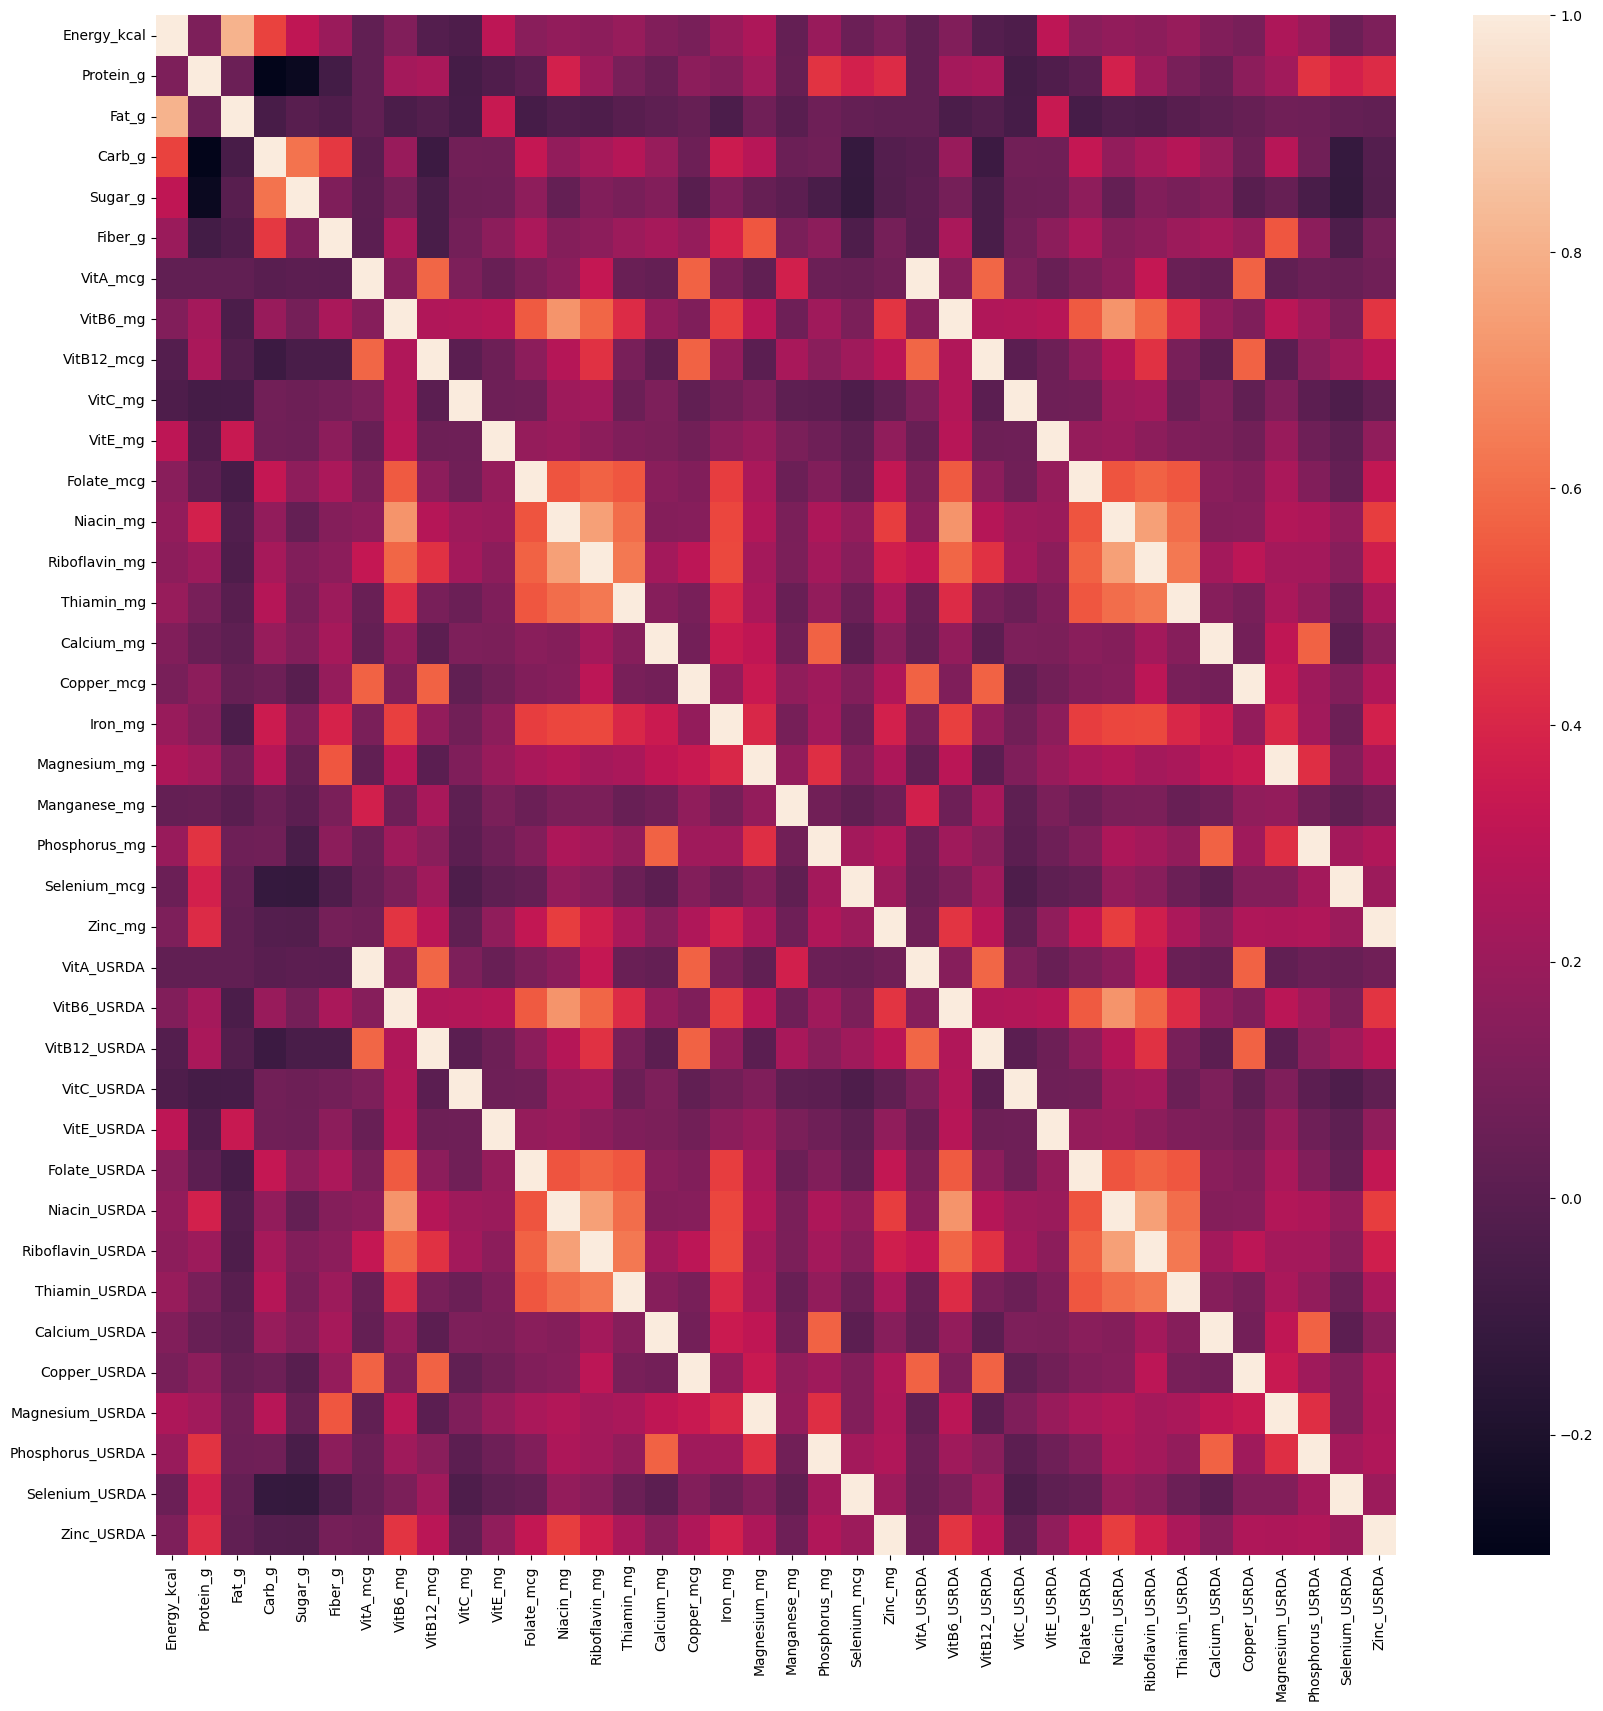

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(exclude=['object']).corr());

In [111]:
#Sí, las columnas USRDA se deben eliminar porque son iguales que otras columnas ya presentes, por lo que no son necesarias, dan información redundante.

df.drop(df.filter(regex=r"\w+_USRDA\b",axis=1).columns, axis=1, inplace=True)

### Variables no numéricas
Elimina las variables de texto del dataset

In [112]:
df.drop(df.dtypes[df.dtypes == 'object'].index, axis=1, inplace=True)

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [113]:
df = df.apply(lambda x: np.log1p(x+1))

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [114]:
stc = StandardScaler()
df_scaled = stc.fit_transform(df)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [115]:
df.shape

(8618, 23)

In [116]:
pca = PCA(n_components=23)
modelo_pca = pca.fit_transform(df_scaled)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.30217148 0.4656212  0.55216517 0.62447614 0.68299182 0.72919284
 0.76287062 0.79098149 0.81673198 0.83968784 0.86133769 0.88224411
 0.90211728 0.91673889 0.93076748 0.94426342 0.9562759  0.96640181
 0.97596361 0.98358748 0.99089105 0.99672193 1.        ]


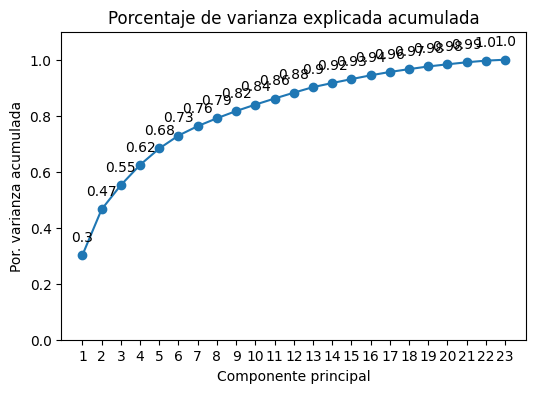

In [117]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [118]:
# Me quedaría con 10

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [119]:
pca2 = PCA(n_components=10)
modelo_pca2 = pca2.fit_transform(df_scaled)

df_pca = pd.DataFrame(modelo_pca2, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.065034,-0.732158,-1.598615,1.011304,-3.938015,0.127326,0.010889,1.816676,0.460495,-0.375850
1,-2.045300,-0.690609,-1.606714,1.006544,-3.918861,0.161137,0.048443,1.845730,0.480486,-0.402080
2,-2.988656,-0.835203,-1.889837,1.958209,-3.954404,1.072292,0.163071,2.051005,0.379944,-0.404972
3,1.419413,-1.252804,-0.316209,-0.958062,-2.484052,-2.162010,0.323875,0.695864,0.534350,-0.130702
4,1.195212,-1.217412,-0.490770,-1.156597,-2.737444,-2.375063,0.563206,0.666744,0.838776,-0.075476
...,...,...,...,...,...,...,...,...,...,...
8613,2.459988,-2.627093,0.286505,-0.037935,-2.666048,-0.179564,0.004842,-0.445536,-0.379243,0.582352
8614,-0.010782,-1.844140,0.591762,-1.481067,0.399457,-0.632916,-0.192966,-0.521879,-1.082378,0.175636
8615,-2.721549,1.942193,-1.043682,1.460769,1.073934,-0.771741,1.362052,-1.116321,-0.757418,0.904317
8616,0.988255,-0.878798,0.400962,-1.634138,-1.586545,0.923027,-0.904274,-0.337263,-0.719499,0.856513


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [120]:
df = pd.read_csv("data/nndb_flat.csv", index_col=0)
target = df['FoodGroup'].reset_index().drop("ID", axis=1)
x = df.drop(['FoodGroup'], axis=1)

In [121]:
x.drop(x.filter(regex=r"\w+_USRDA\b",axis=1).columns, axis=1, inplace=True)

x.drop(x.dtypes[x.dtypes == 'object'].index, axis=1, inplace=True)

x = x.apply(lambda x: np.log1p(x+1))

stc = StandardScaler()
df_scaled = stc.fit_transform(x)

pca = PCA(n_components=10)
modelo_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(modelo_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.065034,-0.732158,-1.598623,1.011296,-3.938033,0.127419,0.010423,1.816267,0.459411,-0.378586
1,-2.045300,-0.690609,-1.606724,1.006539,-3.918883,0.161160,0.048027,1.845047,0.479560,-0.404056
2,-2.988656,-0.835203,-1.889841,1.958189,-3.954409,1.072595,0.162354,2.051634,0.378717,-0.411063
3,1.419413,-1.252804,-0.316204,-0.958075,-2.483978,-2.161547,0.323565,0.697969,0.532832,-0.133824
4,1.195213,-1.217412,-0.490772,-1.156593,-2.737358,-2.374781,0.563116,0.668278,0.837582,-0.075183
...,...,...,...,...,...,...,...,...,...,...
8613,2.459988,-2.627092,0.286466,-0.037863,-2.666198,-0.181002,0.005517,-0.451007,-0.374616,0.590162
8614,-0.010782,-1.844141,0.591748,-1.481022,0.399525,-0.633227,-0.192411,-0.522503,-1.081980,0.184192
8615,-2.721549,1.942194,-1.043719,1.460825,1.073855,-0.772708,1.362365,-1.120573,-0.754896,0.912001
8616,0.988254,-0.878797,0.400912,-1.634040,-1.586600,0.921571,-0.903288,-0.342511,-0.715043,0.872601


In [122]:
df_new = pd.concat([df_pca, target], axis=1)

In [129]:
df_new.groupby('FoodGroup').mean().sort_values("PC1").index[0]

'Soups, Sauces, and Gravies'

In [134]:
best_PCA = pd.DataFrame(columns=["FoodGroup"])

for col in df_new.groupby('FoodGroup').mean().columns:
    best_PCA.loc[col] = df_new.groupby('FoodGroup').mean().sort_values(col).index[0]

best_PCA

,FoodGroup
PC1,"Soups, Sauces, and Gravies"
PC2,Beef Products
PC3,Fats and Oils
PC4,Spices and Herbs
PC5,Fats and Oils
PC6,Dairy and Egg Products
PC7,Fats and Oils
PC8,Sweets
PC9,Cereal Grains and Pasta
PC10,Nut and Seed Products
